# Project: Wrangle and Analyze Data - WeRateDogs

## Table of Contents


- Introduction
- Gathering Data
- Accessing Data
- Cleaning Data
- Data Visualization

## Introduction

#### Goal:  wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 

#### About the DataSet
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

#### Supporting Files:

- The WeRateDogs Twitter archive: twitter-archive-enhanced-2.csv

- The tweet image predictions (image-predictions-3.tsv)

- JSON datafile of tweet ID, retweet count, and favorite count (tweet_json.txt) 

## Gathering Data

In [1]:
# Import all the libraries
import pandas as pd
import numpy as np
import requests   #download data
import tweepy   #twitter api      
import json   #for json data
import time
import datetime
# import random
from datetime import datetime

import matplotlib.pyplot as plt
# from matplotlib import cm
%matplotlib inline

import seaborn as sns   #data visualization

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced-2.csv')
df_twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
df_images = pd.read_csv('image-predictions-3.tsv', sep = '\t')
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
#keys and token to access the API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)
api

In [5]:
api_data = pd.read_json('tweet_json.txt', lines=True)
api_data.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Accessing Data

#### Accessing *df_twitter*

In [6]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
df_twitter.shape

(2356, 17)

In [8]:
df_twitter['tweet_id'].duplicated().sum()

0

In [9]:
df_twitter.isnull().sum()               

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
df_twitter[df_twitter['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
df_twitter['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [12]:
df_twitter['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

##### Data Quality Issues

1. Null values
    -  in_reply_to_status_id         
    -  in_reply_to_user_id           
    -  retweeted_status_id           
    -  retweeted_status_user_id      
    -  retweeted_status_timestamp    
    -  expanded_urls                   


2. Missing values
    -  in_reply_to_status_id         
    -  in_reply_to_user_id           
    -  retweeted_status_id           
    -  retweeted_status_user_id      
    -  retweeted_status_timestamp    
    -  expanded_urls 
    
    
3. Incorrect data types
    -  tweet_id                    
    -  in_reply_to_status_id       
    -  in_reply_to_user_id         
    -  timestamp                   
    -  retweeted_status_id           
    -  retweeted_status_user_id      
    -  retweeted_status_timestamp   


4. Minimum value as 0 for rating_denominator


5. Max value of rating_numerator is 1776; max value of rating_denominator is 170




##### Data Tidiness Issues

1. There are 4 columns for dog stages (doggo, floofer, pupper, puppo)

2. Dog names as 'a' and 'None'


#### Accessing *df_images*

In [13]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_images.shape

(2075, 12)

In [15]:
df_images['jpg_url'].duplicated().sum()

66

In [16]:
df_images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

##### Data Quality Issues

1. Incorrect data types
    - tweet_id  
    
2. Data amount
    -  Not all data have images
    
    
##### Data Tidiness Issues

1. Duplicated jpg_url

#### Accessing *api_data*

In [17]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [18]:
api_data.shape

(2354, 31)

In [19]:
twitter_ids = list(df_twitter.tweet_id.unique())

In [20]:
tweet_data = {}
for tweet_id in twitter_ids:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
        #tweet_data[str(tweet_id)] = tweet_status._json
        tweet_data.append(tweet_status)
    except tweepy.TweepError as e:
        print("Error for: " +str(tweet_id))

Error for: 892420643555336193
Error for: 892177421306343426
Error for: 891815181378084864
Error for: 891689557279858688
Error for: 891327558926688256
Error for: 891087950875897856
Error for: 890971913173991426
Error for: 890729181411237888
Error for: 890609185150312448
Error for: 890240255349198849
Error for: 890006608113172480
Error for: 889880896479866881
Error for: 889665388333682689
Error for: 889638837579907072
Error for: 889531135344209921
Error for: 889278841981685760
Error for: 888917238123831296
Error for: 888804989199671297
Error for: 888554962724278272
Error for: 888202515573088257
Error for: 888078434458587136
Error for: 887705289381826560
Error for: 887517139158093824
Error for: 887473957103951883
Error for: 887343217045368832
Error for: 887101392804085760
Error for: 886983233522544640
Error for: 886736880519319552
Error for: 886680336477933568
Error for: 886366144734445568
Error for: 886267009285017600
Error for: 886258384151887873
Error for: 886054160059072513
Error for:

Error for: 840698636975636481
Error for: 840696689258311684
Error for: 840632337062862849
Error for: 840370681858686976
Error for: 840268004936019968
Error for: 839990271299457024
Error for: 839549326359670784
Error for: 839290600511926273
Error for: 839239871831150596
Error for: 838952994649550848
Error for: 838921590096166913
Error for: 838916489579200512
Error for: 838831947270979586
Error for: 838561493054533637
Error for: 838476387338051585
Error for: 838201503651401729
Error for: 838150277551247360
Error for: 838085839343206401
Error for: 838083903487373313
Error for: 837820167694528512
Error for: 837482249356513284
Error for: 837471256429613056
Error for: 837366284874571778
Error for: 837110210464448512
Error for: 837012587749474308
Error for: 836989968035819520
Error for: 836753516572119041
Error for: 836677758902222849
Error for: 836648853927522308
Error for: 836397794269200385
Error for: 836380477523124226
Error for: 836260088725786625
Error for: 836001077879255040
Error for:

Error for: 805487436403003392
Error for: 805207613751304193
Error for: 804738756058218496
Error for: 804475857670639616
Error for: 804413760345620481
Error for: 804026241225523202
Error for: 803773340896923648
Error for: 803692223237865472
Error for: 803638050916102144
Error for: 803380650405482500
Error for: 803321560782307329
Error for: 803276597545603072
Error for: 802952499103731712
Error for: 802624713319034886
Error for: 802600418706604034
Error for: 802572683846291456
Error for: 802323869084381190
Error for: 802265048156610565
Error for: 802247111496568832
Error for: 802239329049477120
Error for: 802185808107208704
Error for: 801958328846974976
Error for: 801854953262350336
Error for: 801538201127157760
Error for: 801285448605831168
Error for: 801167903437357056
Error for: 801127390143516673
Error for: 801115127852503040
Error for: 800859414831898624
Error for: 800855607700029440
Error for: 800751577355128832
Error for: 800513324630806528
Error for: 800459316964663297
Error for:

Error for: 770093767776997377
Error for: 770069151037685760
Error for: 769940425801170949
Error for: 769695466921623552
Error for: 769335591808995329
Error for: 769212283578875904
Error for: 768970937022709760
Error for: 768909767477751808
Error for: 768855141948723200
Error for: 768609597686943744
Error for: 768596291618299904
Error for: 768554158521745409
Error for: 768473857036525572
Error for: 768193404517830656
Error for: 767884188863397888
Error for: 767754930266464257
Error for: 767500508068192258
Error for: 767191397493538821
Error for: 767122157629476866
Error for: 766864461642756096
Error for: 766793450729734144
Error for: 766714921925144576
Error for: 766693177336135680
Error for: 766423258543644672
Error for: 766313316352462849
Error for: 766078092750233600
Error for: 766069199026450432
Error for: 766008592277377025
Error for: 765719909049503744
Error for: 765669560888528897
Error for: 765395769549590528
Error for: 765371061932261376
Error for: 765222098633691136
Error for:

Error for: 736365877722001409
Error for: 736225175608430592
Error for: 736010884653420544
Error for: 735991953473572864
Error for: 735648611367784448
Error for: 735635087207878657
Error for: 735274964362878976
Error for: 735256018284875776
Error for: 735137028879360001
Error for: 734912297295085568
Error for: 734787690684657664
Error for: 734776360183431168
Error for: 734559631394082816
Error for: 733828123016450049
Error for: 733822306246479872
Error for: 733482008106668032
Error for: 733460102733135873
Error for: 733109485275860992
Error for: 732732193018155009
Error for: 732726085725589504
Error for: 732585889486888962
Error for: 732375214819057664
Error for: 732005617171337216
Error for: 731285275100512256
Error for: 731156023742988288
Error for: 730924654643314689
Error for: 730573383004487680
Error for: 730427201120833536
Error for: 730211855403241472
Error for: 730196704625098752
Error for: 729854734790754305
Error for: 729838605770891264
Error for: 729823566028484608
Error for:

Error for: 702321140488925184
Error for: 702276748847800320
Error for: 702217446468493312
Error for: 701981390485725185
Error for: 701952816642965504
Error for: 701889187134500865
Error for: 701805642395348998
Error for: 701601587219795968
Error for: 701570477911896070
Error for: 701545186879471618
Error for: 701214700881756160
Error for: 700890391244103680
Error for: 700864154249383937
Error for: 700847567345688576
Error for: 700796979434098688
Error for: 700747788515020802
Error for: 700518061187723268
Error for: 700505138482569216
Error for: 700462010979500032
Error for: 700167517596164096
Error for: 700151421916807169
Error for: 700143752053182464
Error for: 700062718104104960
Error for: 700029284593901568
Error for: 700002074055016451
Error for: 699801817392291840
Error for: 699788877217865730
Error for: 699779630832685056
Error for: 699775878809702401
Error for: 699691744225525762
Error for: 699446877801091073
Error for: 699434518667751424
Error for: 699423671849451520
Error for:

Error for: 683852578183077888
Error for: 683849932751646720
Error for: 683834909291606017
Error for: 683828599284170753
Error for: 683773439333797890
Error for: 683742671509258241
Error for: 683515932363329536
Error for: 683498322573824003
Error for: 683481228088049664
Error for: 683462770029932544
Error for: 683449695444799489
Error for: 683391852557561860
Error for: 683357973142474752
Error for: 683142553609318400
Error for: 683111407806746624
Error for: 683098815881154561
Error for: 683078886620553216
Error for: 683030066213818368
Error for: 682962037429899265
Error for: 682808988178739200
Error for: 682788441537560576
Error for: 682750546109968385
Error for: 682697186228989953
Error for: 682662431982772225
Error for: 682638830361513985
Error for: 682429480204398592
Error for: 682406705142087680
Error for: 682393905736888321
Error for: 682389078323662849
Error for: 682303737705140231
Error for: 682259524040966145
Error for: 682242692827447297
Error for: 682088079302213632
Error for:

Error for: 674271431610523648
Error for: 674269164442398721
Error for: 674265582246694913
Error for: 674262580978937856
Error for: 674255168825880576
Error for: 674082852460433408
Error for: 674075285688614912
Error for: 674063288070742018
Error for: 674053186244734976
Error for: 674051556661161984
Error for: 674045139690631169
Error for: 674042553264685056
Error for: 674038233588723717
Error for: 674036086168010753
Error for: 674024893172875264
Error for: 674019345211760640
Error for: 674014384960745472
Error for: 674008982932058114
Error for: 673956914389192708
Error for: 673919437611909120
Error for: 673906403526995968
Error for: 673887867907739649
Error for: 673716320723169284
Error for: 673715861853720576
Error for: 673711475735838725
Error for: 673709992831262724
Error for: 673708611235921920
Error for: 673707060090052608
Error for: 673705679337693185
Error for: 673700254269775872
Error for: 673697980713705472
Error for: 673689733134946305
Error for: 673688752737402881
Error for:

Error for: 668932921458302977
Error for: 668902994700836864
Error for: 668892474547511297
Error for: 668872652652679168
Error for: 668852170888998912
Error for: 668826086256599040
Error for: 668815180734689280
Error for: 668779399630725120
Error for: 668655139528511488
Error for: 668645506898350081
Error for: 668643542311546881
Error for: 668641109086707712
Error for: 668636665813057536
Error for: 668633411083464705
Error for: 668631377374486528
Error for: 668627278264475648
Error for: 668625577880875008
Error for: 668623201287675904
Error for: 668620235289837568
Error for: 668614819948453888
Error for: 668587383441514497
Error for: 668567822092664832
Error for: 668544745690562560
Error for: 668542336805281792
Error for: 668537837512433665
Error for: 668528771708952576
Error for: 668507509523615744
Error for: 668496999348633600
Error for: 668484198282485761
Error for: 668480044826800133
Error for: 668466899341221888
Error for: 668297328638447616
Error for: 668291999406125056
Error for:

In [21]:
#api_data = []

#read the created file
#with open("tweet-json.txt", "r") as f:
#    for line in f:
#        try: 
#            tweet = json.loads(line)
#            #append a dictionary to the created list            
#            api_data.append({
#                "tweet_id": tweet["id"],
#                "retweet_count": tweet["retweet_count"],
#                "favorite_count": tweet["favorite_count"],
#                "retweeted": tweet["retweeted"],
#                "display_text_range": tweet["display_text_range"]                
#            })               
#                
#            #tweet["entities"]["media"][0]["media_url"]
#        except:
#            print("Error.") 
#            
#df_api = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
#df_api.head()

In [22]:
# Load the Twitter API data
api_data = pd.read_json('tweet_json.txt', lines=True)
api_data['tweet_id'] = api_data['id']
api_data = api_data[['tweet_id', 'favorite_count', 'retweet_count']]

In [23]:
api_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [24]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
api_data['tweet_id'].duplicated().sum()

0

##### Data Quality Issues

1. Incorrect data types
    - tweet_id  
    
    

## Cleaning Data

- Merge tables together


In [26]:
# create copies of the dataframes for cleaning
twitter_clean = df_twitter.copy()
images_clean = df_images.copy()
api_clean = api_data.copy()

In [27]:
twitter_clean = pd.merge(twitter_clean, images_clean, how ='inner', on = 'tweet_id')
twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
169,852226086759018497,NaN,NaN,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
507,794205286408003585,NaN,NaN,2016-11-03 15:51:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794205286...,...,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
1323,688064179421470721,NaN,NaN,2016-01-15 18:24:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179...,...,1,Eskimo_dog,0.240602,True,Norwegian_elkhound,0.180369,True,Siberian_husky,0.090739,True
1874,669680153564442624,NaN,NaN,2015-11-26 00:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shawwn. He's a Turkish Gangrene Robitu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669680153...,...,1,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True
1946,668274247790391296,NaN,NaN,2015-11-22 03:46:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sophie. Her son just got in the car to le...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668274247...,...,1,soft-coated_wheaten_terrier,0.406374,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True


In [28]:
twitter_clean = pd.merge(twitter_clean, api_clean, how ='inner', on = 'tweet_id')

In [29]:
twitter_clean.shape

(2073, 30)

In [30]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [31]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

- Drop duplicated jpg_url


In [32]:
twitter_clean.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

In [33]:
twitter_clean.rating_denominator.describe()

count    2008.000000
mean       10.528386
std         7.295267
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [34]:
twitter_clean.rating_numerator.describe()

count    2008.000000
mean       12.277888
std        41.353212
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [35]:
twitter_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [36]:
twitter_clean['name'].nunique()

936

In [37]:
twitter_clean['name'].value_counts()

None         560
a             55
Charlie       11
Lucy          10
Oliver        10
            ... 
Sojourner      1
Nugget         1
Rizzy          1
Obie           1
Herb           1
Name: name, Length: 936, dtype: int64

- Remove the weird dog names


In [38]:
# replace 'a' and 'None' with NaNs
twitter_clean['name'].replace('a', np.nan, inplace = True)
twitter_clean['name'].replace('None', np.nan, inplace = True)

In [39]:
twitter_clean['name'].value_counts()

Charlie      11
Cooper       10
Oliver       10
Lucy         10
Tucker        9
             ..
Sojourner     1
Nugget        1
Rizzy         1
Obie          1
Herb          1
Name: name, Length: 934, dtype: int64

- Correct dog_stage column

In [40]:
dog_stage_col = ['doggo', 'floofer', 'pupper', 'puppo']
id_vars = [x for x in twitter_clean.columns.tolist() if x not in dog_stage_col]

twitter_clean = pd.melt(twitter_clean, id_vars = id_vars, value_vars = dog_stage_col,
                        value_name = 'dog_stage')

In [41]:
# replace 'None' with NaNs
twitter_clean['dog_stage'].replace('None', np.nan, inplace = True)

# change dtype to categorical
twitter_clean['dog_stage'] = twitter_clean['dog_stage'].astype("category")

In [42]:
twitter_clean['dog_stage'].value_counts()

pupper     215
doggo       74
puppo       23
floofer      8
Name: dog_stage, dtype: int64

In [43]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'variable', 'dog_stage'],
      dtype='object')

In [44]:
# Modify Data types

twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype('str')
twitter_clean['in_reply_to_status_id'] = twitter_clean['in_reply_to_status_id'].astype('str')
twitter_clean['in_reply_to_user_id'] = twitter_clean['in_reply_to_user_id'].astype('str')
twitter_clean['retweeted_status_id'] = twitter_clean['retweeted_status_id'].astype('str')
twitter_clean['retweeted_status_user_id'] = twitter_clean['retweeted_status_user_id'].astype('str')


# Format Date

twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'], format="%Y-%m-%d %H:%M:%S +0000")
twitter_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_clean['retweeted_status_timestamp'], format="%Y-%m-%d %H:%M:%S +0000")

In [45]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8032 entries, 0 to 8031
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    8032 non-null   object        
 1   in_reply_to_status_id       8032 non-null   object        
 2   in_reply_to_user_id         8032 non-null   object        
 3   timestamp                   8032 non-null   datetime64[ns]
 4   source                      8032 non-null   object        
 5   text                        8032 non-null   object        
 6   retweeted_status_id         8032 non-null   object        
 7   retweeted_status_user_id    8032 non-null   object        
 8   retweeted_status_timestamp  56 non-null     datetime64[ns]
 9   expanded_urls               8032 non-null   object        
 10  rating_numerator            8032 non-null   int64         
 11  rating_denominator          8032 non-null   int64       

In [46]:
# add new 'rating' column by dividing rating_numerator by rating_denominator
twitter_clean['rating'] = twitter_clean['rating_numerator'] / twitter_clean['rating_denominator']

In [47]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,variable,dog_stage,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,39467,8853,doggo,NaN,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,33819,6514,doggo,NaN,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,25461,4328,doggo,NaN,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,42908,8964,doggo,NaN,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,doggo,NaN,1.2


In [61]:
# save cleaned twitter dataframe to a CSV file
twitter_clean.to_csv('twitter_archive_master.csv')

## Data Visualization

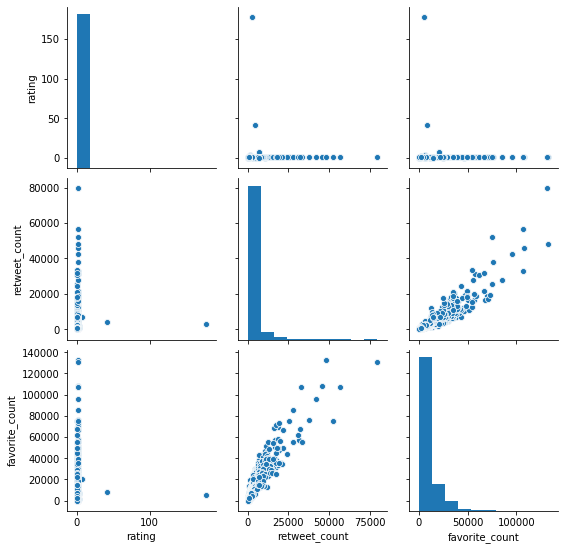

In [48]:
sns.pairplot(twitter_clean,
            vars = ['rating', 'retweet_count','favorite_count'])

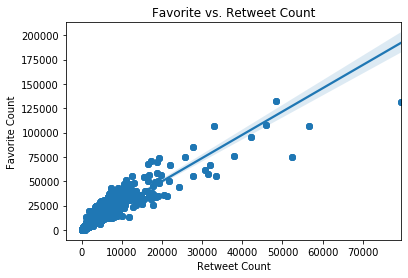

In [49]:
sns.regplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_clean)
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

The retweet count and favorite count have positive correlation, suggesting the more retweet is relavent to the more favorite. 

Text(0.5, 0.98, 'Dog stages')

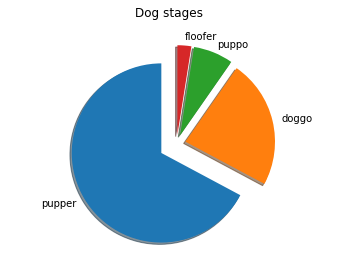

In [50]:
# pie chart of dog stage
dog_stage_count = list(twitter_clean[twitter_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = twitter_clean[twitter_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

plt.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
plt.axis('equal')
plt.suptitle('Dog stages')


The most common dog stage is pupper. The least common dog stage is floofer.

Text(0.5, 0.98, 'Rating variation by dog stages')

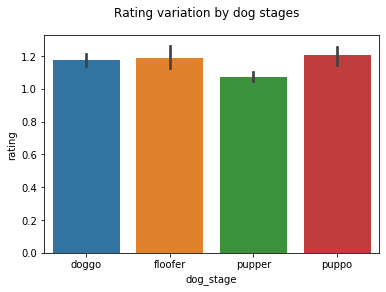

In [51]:
sns.barplot(data=twitter_clean, y='rating', x='dog_stage')
plt.suptitle('Rating variation by dog stages')

The pupper dog stage has the lowest average rating.

Text(0.5, 0.98, 'Most common dog names')

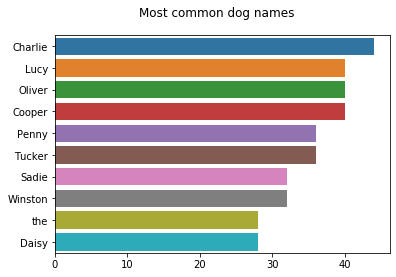

In [52]:
names = twitter_clean['name'].value_counts()[:10]
sns.barplot(names.values, names.index)
plt.suptitle('Most common dog names')

Indeed, most dogs have no names. At least, they were not recorded in the dataset. However, after eliminate the dogs without names (or just weird name like 'a'). The top most popular names are: Charlie, Oliver, Lucy, Cooper, Tucker, Penny, Winston, Sadie, Daisy, and Toby.

Text(0.5, 0.98, 'Most common dog type')

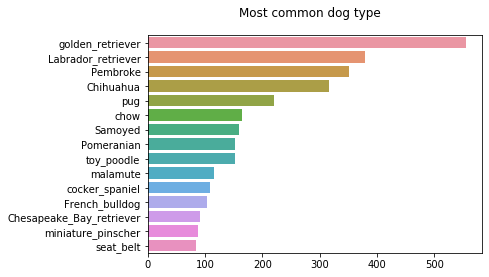

In [53]:
dog_type = twitter_clean['p1'].value_counts()[:15]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Most common dog type')

The most common dog type in the dataset is golden retriever.

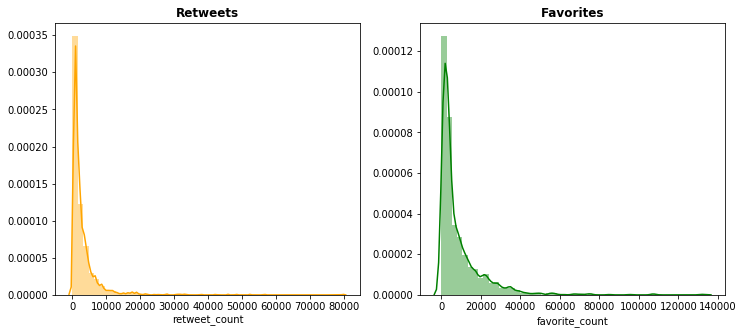

In [54]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(twitter_clean['retweet_count'], color = 'orange')
plt.title('Retweets', fontweight="bold", fontsize = 12.0)

plt.subplot(122)
sns.distplot(twitter_clean['favorite_count'], color = 'green')
plt.title('Favorites', fontweight="bold", fontsize = 12.0)

plt.show()

In [55]:
twitter_clean['rating_numerator'].describe()

count    8032.000000
mean       12.277888
std        41.345488
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [56]:
twitter_clean.drop(twitter_clean.loc[twitter_clean['rating_numerator'] >= 20].index, inplace = True)

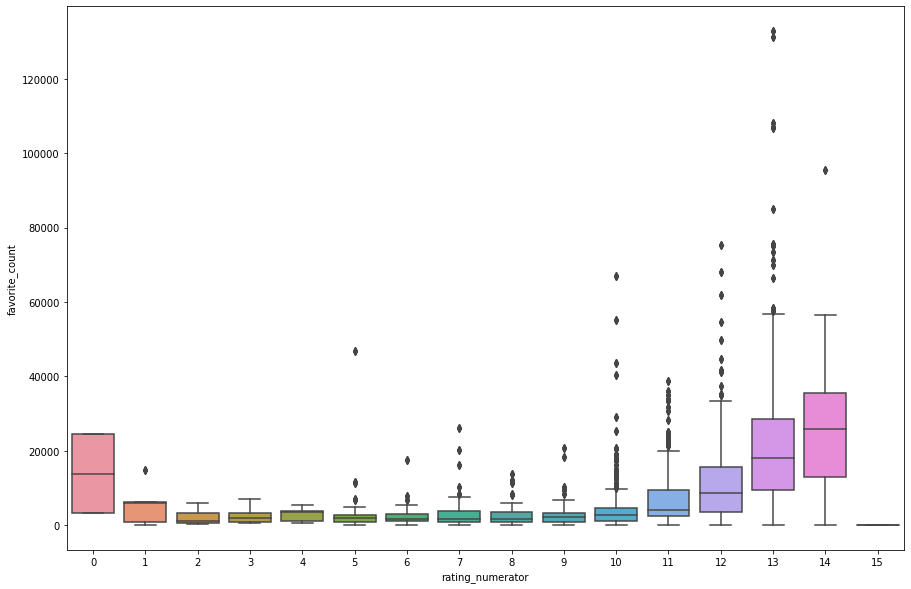

In [57]:
plt.figure(figsize = (15, 10))
sns.boxplot(twitter_clean['rating_numerator'], twitter_clean['favorite_count'])

In [58]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'variable', 'dog_stage', 'rating'],
      dtype='object')

In [59]:
twitter_clean['rating'].describe()

count    7956.000000
mean        1.054779
std         0.220127
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.500000
Name: rating, dtype: float64

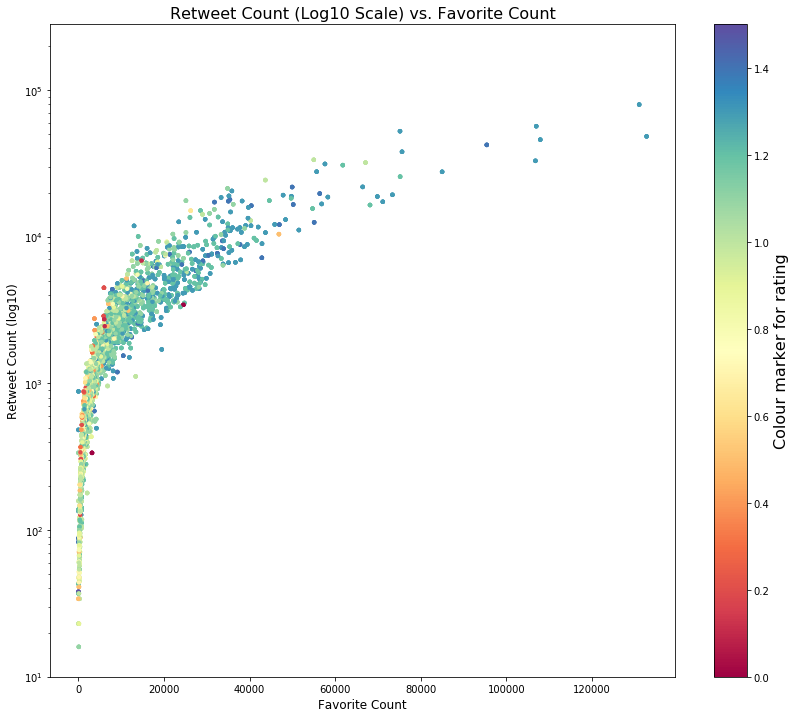

In [60]:
twitter_clean.drop(twitter_clean.loc[twitter_clean['rating'] >= 2].index, inplace = True)

from matplotlib import cm
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.yscale('log')
plt.ylim(10, twitter_clean['retweet_count'].max()+200000)
colours = twitter_clean['rating']


plt.scatter(twitter_clean['favorite_count'], twitter_clean['retweet_count'], 
            c = colours, s = 20, cmap = cmap, edgecolor = 'none')

# title and labels
plt.title('Retweet Count (Log10 Scale) vs. Favorite Count', fontsize = 16)
plt.xlabel('Favorite Count', fontsize = 12)
plt.ylabel('Retweet Count (log10)', fontsize = 12)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Colour marker for rating', fontsize = 16)

plt.show();

Previously, we showed the positive correlation between the retweet count and favorite count. Here in this plot, we focus on the majority of the tweets as we filtered out the outliers.
This plot includes the rating level for the majority data points as the darker red indicates the lower ratings and green and blue suggest higher ratings.